# Assignment 1 (Coding Part)

- Implement the required code for each problem in the allocated area.
- Write down your comments clearly.
- Please submit your notebook with outputs displayed.

## Exercise 1.10

In [1]:
import random
def flip_coin():
    # TODO: add fair coin flipping experiment code
    coins = []
    for i in range(1000):
        coins.append([random.randint(0,1) for _ in range(10)])
    # calculate the fraction of heads for each coin
    v1 = coins[0].count(1)/10
    crand = random.randint(1,999)
    vrand = coins[crand].count(1)/10
    # find the coin with the minimum frequency of heads
    cmin = 0
    for i in range(1,1000):
        if coins[i].count(1) < coins[cmin].count(1) and i!=crand:
            cmin = i
    vmin = coins[cmin].count(1)/10
    return v1, vrand, vmin

### Exercise 1.10 (a)

In [12]:
# TODO: add solution for point a
v1, vrand, vmin = flip_coin()
mu_1=0.5
mu_rand=0.5
mu_min=0.5

### Exercise 1.10 (b)

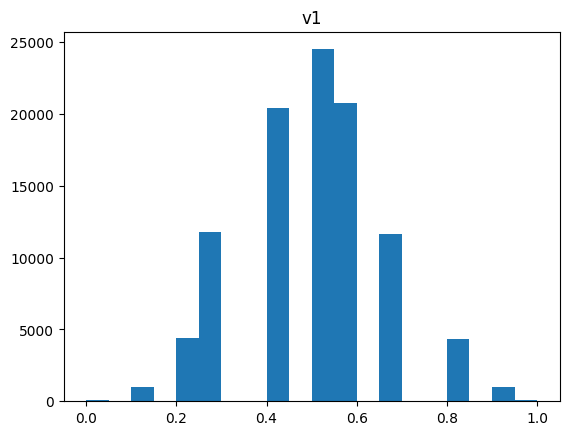

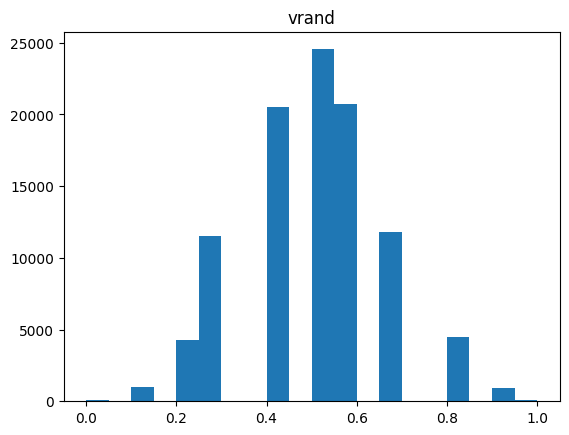

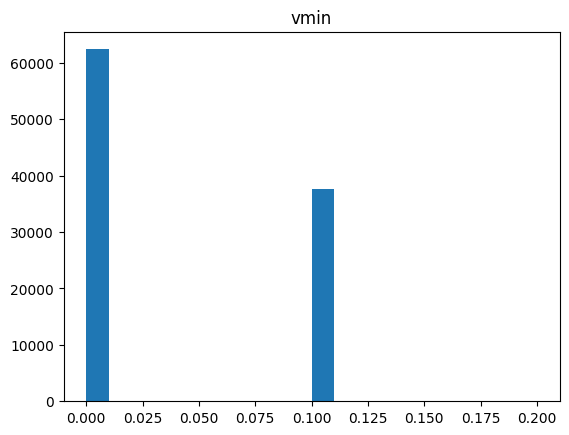

In [3]:
# TODO: add solution for point b
import matplotlib.pyplot as plt
v1s = []
vrands = []
vmins = []
for i in range(100000):
    v1, vrand, vmin = flip_coin()
    v1s.append(v1)
    vrands.append(vrand)
    vmins.append(vmin)
plt.hist(v1s, bins=20)
plt.title('v1')
plt.show()
plt.hist(vrands, bins=20)
plt.title('vrand')
plt.show()
plt.hist(vmins, bins=20)
plt.title('vmin')
plt.show()


### Exercise 1.10 (c)

mu_1: 0.5, mu_rand: 0.5, mu_min: 0.5


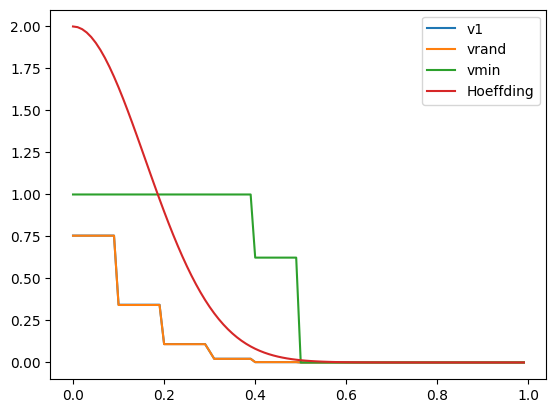

In [14]:
# TODO: add solution for point c
import numpy as np
eps = np.arange(0,1,0.01)
p_v1 = []
p_vrand = []
p_vmin = []


print(f'mu_1: {mu_1}, mu_rand: {mu_rand}, mu_min: {mu_min}')
for e in eps:
    p_v1.append(sum([1 for v in v1s if abs(v-mu_1)>e])/100000)
    p_vrand.append(sum([1 for v in vrands if abs(v-mu_rand)>e])/100000)
    p_vmin.append(sum([1 for v in vmins if abs(v-mu_min)>e])/100000)
hoeffding = [2*np.exp(-2*e*e*10) for e in eps]
plt.plot(eps, p_v1, label='v1')
plt.plot(eps, p_vrand, label='vrand')
plt.plot(eps, p_vmin, label='vmin')
plt.plot(eps, hoeffding, label='Hoeffding')
plt.legend()
plt.show()


### Exercise 1.10 (d)

In [5]:
# TODO: add solution for point d
'''
all three coins (c1, crand, and cmin) should theoretically obey the Hoeffding bound. 
This is because the Hoeffding bound provides an upper bound on the probability that 
the observed fraction of heads for each coin deviates significantly from its expected value
However min coin doesnt doesnt follow Hoeffding bound as it diverges from the bound 
'''


'\nall three coins (c1, crand, and cmin) should theoretically obey the Hoeffding bound. \nThis is because the Hoeffding bound provides an upper bound on the probability that \nthe observed fraction of heads for each coin deviates significantly from its expected value\nHowever min coin doesnt doesnt follow Hoeffding bound as it diverges from the bound \n'

### Exercise 1.10 (e)

In [6]:
# TODO: add solution for point e
'''
- The observations made with the coins can be extended to the scenario of selecting a bin from M bins.
- Randomly choosing a bin is analogous to selecting a coin at random, and it complies with the Hoeffding bound.
- Opting for a specific bin with the minimum error is akin to choosing a particular coin with the fewest number of heads 
  both scenarios do not follow the Hoeffding bound as they are not based on random and independent choices.
'''

'\n- The observations made with the coins can be extended to the scenario of selecting a bin from M bins.\n- Randomly choosing a bin is analogous to selecting a coin at random, and it complies with the Hoeffding bound.\n- Opting for a specific bin with the minimum error is akin to choosing a particular coin with the fewest number of heads \n  both scenarios do not follow the Hoeffding bound as they are not based on random and independent choices.\n'

## Problem 1.4

### Problem 1.4 (a)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def generate_dataset(size=20,seeds=100):
    # TODO: add dataset generation code
    np.random.seed(seeds)
    w0 = np.random.uniform(-999,999)
    w1 = np.random.uniform(-999,999)
    w2 = np.random.uniform(-999,999)
    D = np.random.uniform(-1,1,(size,2))
    y = np.sign(np.dot(np.hstack((np.ones((size,1)),D)),np.array([w0,w1,w2])))
    plt.scatter(D[:,0],D[:,1],c=y)
    plt.plot(D[:,0],-w1/w2*D[:,0]-w0/w2,c='r')
    plt.show()
    return D, y, w0, w1, w2

# generate_dataset()

### Problem 1.4 (b)

In [8]:
def run_perceptron_learning(size=20,seeds=100):
    # TODO: add perceptron learning algorithm code
    D, y, w0, w1, w2 = generate_dataset(size,seeds)
    w = np.zeros(3)
    converged = False
    updates = 0
    while not converged:
        converged = True
        for i in range(size):
            if np.sign(np.dot(w, np.hstack((1, D[i])))) != y[i]:
                w += y[i]*np.hstack((1,D[i]))
                converged = False
                updates += 1
    plt.scatter(D[:,0],D[:,1],c=y)
    plt.plot(D[:,0],-w1/w2*D[:,0]-w0/w2,c='r')
    plt.plot(D[:,0],-w[1]/w[2]*D[:,0]-w[0]/w[2],c='g')
    plt.show()
    print(f'Number of updates: {updates}')

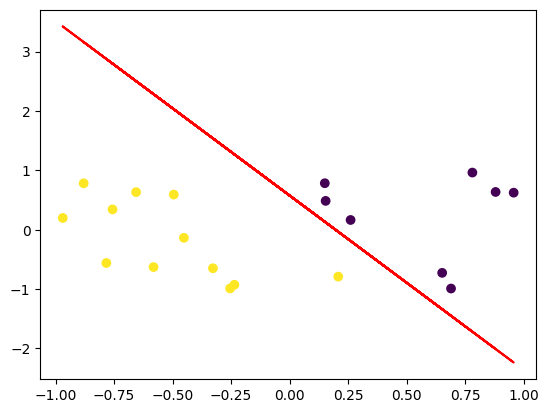

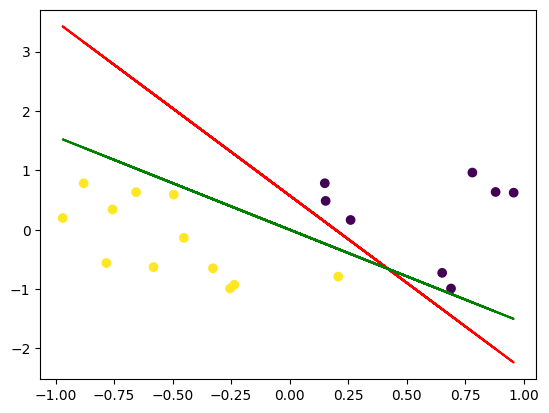

Number of updates: 6


'\nWe may notice that although g is pretty close to f, they\nare not quite identical.\n'

In [9]:
# TODO: add solution for the rest of the point
run_perceptron_learning(size=20,seeds=100)
'''
We may notice that although g is pretty close to f, they
are not quite identical.
'''

### Problem 1.4 (c)

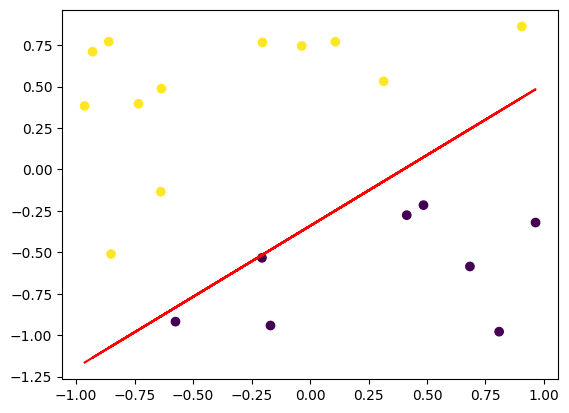

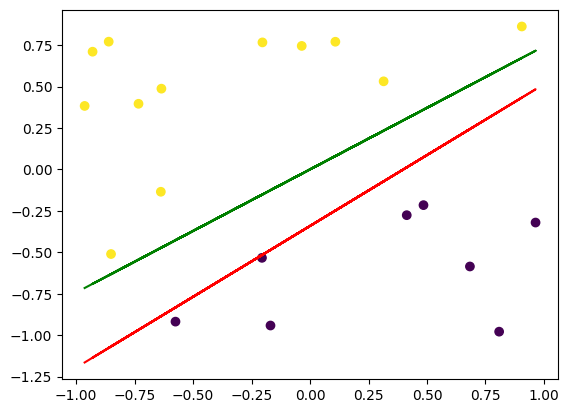

Number of updates: 16


'\nWe may notice that although g is pretty close to f, they\nare not quite identical.\n'

In [10]:
# TODO: add solution for point c
run_perceptron_learning(size=20,seeds=1000)
'''
We may notice that although g is pretty close to f, they
are not quite identical.
'''


### Problem 1.4 (d)

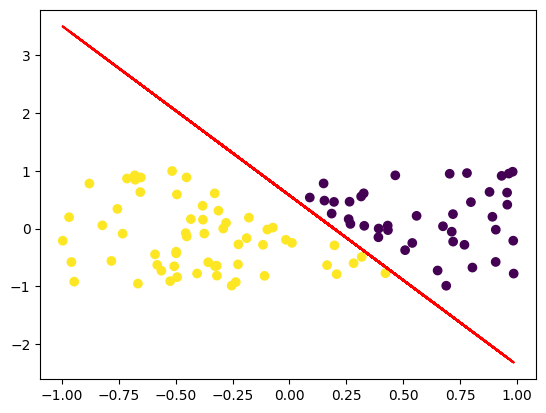

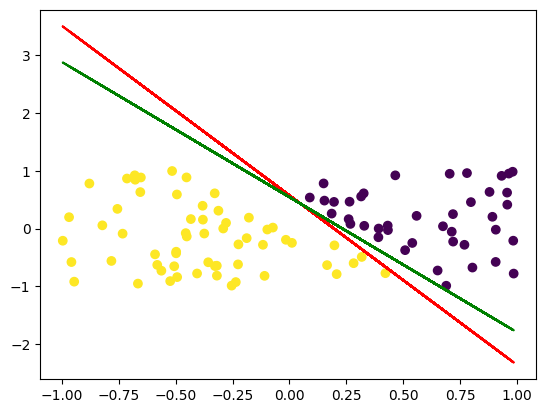

Number of updates: 19


'\nit take more iterations to converge than the in b\nWe maynotice that, here f and g are very close to each other\n'

In [11]:
# TODO: add solution for point d
run_perceptron_learning(size=100,seeds=100)
'''
it take more iterations to converge than the in b
We maynotice that, here f and g are very close to each other
'''


### Problem 1.4 (e)

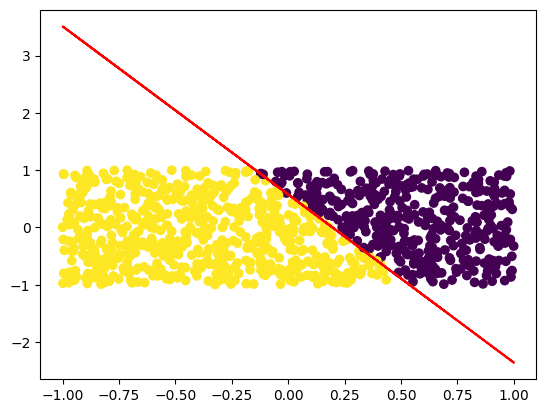

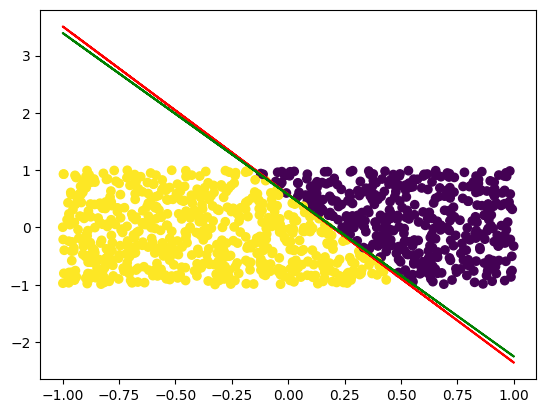

Number of updates: 349


'\nit take more iterations to converge than the in b\nWe may notice that, here f and g are nearly undistinguishable.\n'

In [12]:
# TODO: add solution for point e
run_perceptron_learning(size=1000,seeds=100)
'''
it take more iterations to converge than the in b
We may notice that, here f and g are nearly undistinguishable.
'''

### Problem 1.4 (f)

In [13]:
def generate_dataset_N(N=2,seeds=100):
    np.random.seed(seeds)
    w = np.random.uniform(-1,1,N+1)
    D = np.random.uniform(-1,1,(1000,N))
    y = np.sign(np.dot(np.hstack((np.ones((1000,1)),D)),w))
    return D, y
def run_perceptron_learning_N(N=10):
    D, y = generate_dataset_N(N)
    w_hat = np.zeros(N+1)
    converged = False
    updates = 0
    while not converged:
        converged = True
        for i in range(1000):
            if np.sign(np.dot(w_hat, np.hstack((1, D[i])))) != y[i]:
                w_hat += y[i]*np.hstack((1,D[i]))
                converged = False
                updates += 1
    print(f'Number of updates for N={N} : {updates}')
    return updates
    
run_perceptron_learning_N()
'''
In this case, we may see that the number of iterations is 11197 which is very big, this is a direct consequence
of the increase in dimensions from 2 to 10.
'''


Number of updates for N=10 : 11197


'\nIn this case, we may see that the number of iterations is 11197 which is very big, this is a direct consequence\nof the increase in dimensions from 2 to 10.\n'

### Problem 1.4 (g)

In [14]:
iters = [run_perceptron_learning_N(N=i) for i in range(100)]
plt.hist(iters, bins=20)
plt.xlabel('Number of updates')
plt.ylabel('Count')
plt.show()

'''
We may see that the distribution of the number of updates seems pretty uniform and varies from 1 to
20000
.
'''


Number of updates for N=0 : 1
Number of updates for N=1 : 200
Number of updates for N=2 : 349
Number of updates for N=3 : 1594
Number of updates for N=4 : 3805
Number of updates for N=5 : 16247
Number of updates for N=6 : 12599
Number of updates for N=7 : 6487
Number of updates for N=8 : 2227
Number of updates for N=9 : 2432
Number of updates for N=10 : 11197
Number of updates for N=11 : 3484
Number of updates for N=12 : 10683
Number of updates for N=13 : 4256
Number of updates for N=14 : 20562
Number of updates for N=15 : 6057
Number of updates for N=16 : 4063
Number of updates for N=17 : 6191
Number of updates for N=18 : 11065
Number of updates for N=19 : 12185
Number of updates for N=20 : 5975
Number of updates for N=21 : 9663
Number of updates for N=22 : 7100
Number of updates for N=23 : 10440
Number of updates for N=24 : 10962
Number of updates for N=25 : 12687
Number of updates for N=26 : 8006
Number of updates for N=27 : 5264
Number of updates for N=28 : 7383
Number of updates f

### Problem 1.4 (h)

In [ ]:
'''
As we saw above, the more data points we have (N), the more accurate g becomes in approximating f
and the greater the running time gets. Moreover, the greater d becomes, the greater the running time gets
also.
'''